In [68]:
from PIL import Image  # for display in jupyter notebook
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

In [9]:
def show(im):
    return Image.fromarray(im[:,:,::-1])

im:  (373, 560, 3)


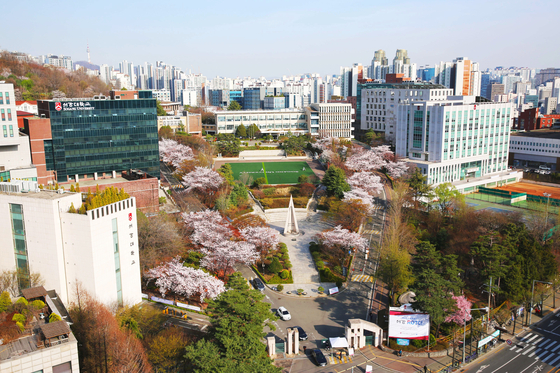

In [10]:
imagefile = 'pixels/sogang.jpg'
im = cv2.imread(imagefile)  # BGR format
print('im: ', im.shape)
show(im)

In [12]:
imflip = np.empty_like(im)
print(imflip.shape, imflip.dtype)

(373, 560, 3) uint8


In [43]:
%%time 
# flipping about y-axis: make upside down 
for r in range(im.shape[0]):
    rd = im.shape[0] - r - 1
    for c in range(im.shape[1]):
        for k in range(3):
            imflip[rd,c,k] = im[r,c,k]

CPU times: total: 281 ms
Wall time: 269 ms


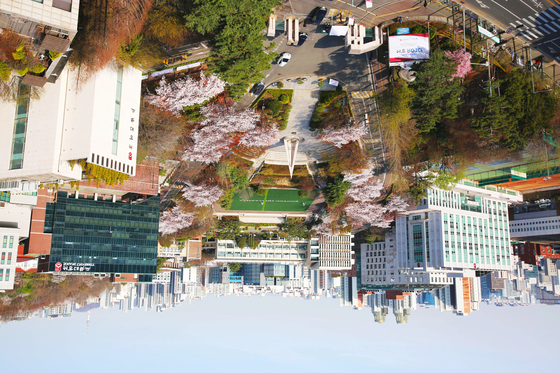

In [14]:
show(imflip)

## numpy mapy, mapx
p = (mapy[0,0], mapx[0,0]) is the source coordinate corresponding to target (0,0)

In [27]:
# numpy version of fliping
# 1. make xy maps
mapy, mapx = np.indices( (im.shape[0], im.shape[1]), dtype=np.float32)
print(mapy[:3])
print(mapx[:3])

[[0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 2. 2.]]
[[  0.   1.   2. ... 557. 558. 559.]
 [  0.   1.   2. ... 557. 558. 559.]
 [  0.   1.   2. ... 557. 558. 559.]]


flipping: target(r, c) -> src(rows - 1 - r, c)
- y coordinates need to be calculated.

In [28]:
mapy = mapy.shape[0] - 1 - mapy
mapy[:3]

array([[372., 372., 372., ..., 372., 372., 372.],
       [371., 371., 371., ..., 371., 371., 371.],
       [370., 370., 370., ..., 370., 370., 370.]], dtype=float32)

In [29]:
(mapy[0,0], mapx[0,0])

(372.0, 0.0)

In [38]:
%%time 
flipped = cv2.remap(im, mapx, mapy, cv2.INTER_LINEAR)

CPU times: total: 0 ns
Wall time: 998 µs


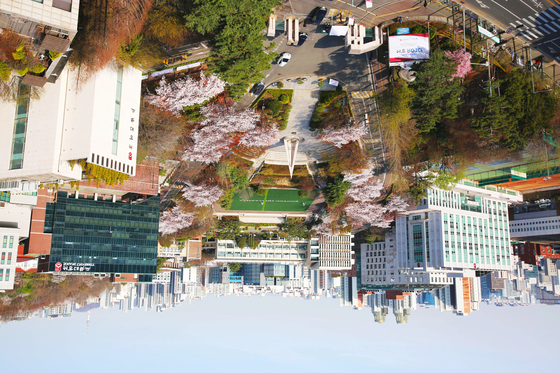

In [39]:
show(flipped)

CPU times: total: 0 ns
Wall time: 5.98 ms


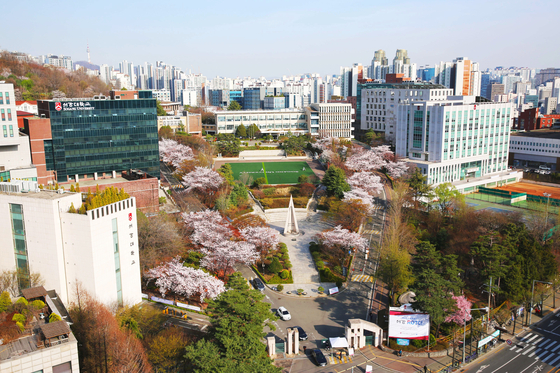

In [41]:
%%time
flipped2 = cv2.remap(flipped, mapx, mapy, cv2.INTER_LINEAR)
show(flipped2)

In [42]:
%%time
np.abs(flipped2 - im).sum()  # difference must be 0

CPU times: total: 0 ns
Wall time: 999 µs


0

## Remapping (Warping) by nonlinear spatial transformation

In [44]:
# initial, identity mapping
mapy, mapyx = np.indices((im.shape[0], im.shape[1]), dtype=np.float32)

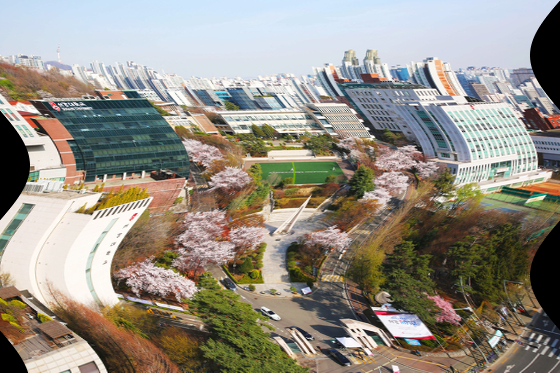

In [55]:
A = 30  # amplitude
L = 35  # wave length
sinx = mapx + A * np.sin(mapy / L)
result = cv2.remap(im, sinx, mapy, cv2.INTER_LINEAR)
show(result)

In [60]:
x = 20
for y in range(im.shape[0]):
    print(f"{y} : {(x,y)} -> {(sinx[y,x], mapy[y,x])}")

0 : (20, 0) -> (20.0, 0.0)
1 : (20, 1) -> (20.857027, 1.0)
2 : (20, 2) -> (21.713352, 2.0)
3 : (20, 3) -> (22.568281, 3.0)
4 : (20, 4) -> (23.421112, 4.0)
5 : (20, 5) -> (24.271152, 5.0)
6 : (20, 6) -> (25.117704, 6.0)
7 : (20, 7) -> (25.96008, 7.0)
8 : (20, 8) -> (26.79759, 8.0)
9 : (20, 9) -> (27.629553, 9.0)
10 : (20, 10) -> (28.455286, 10.0)
11 : (20, 11) -> (29.274117, 11.0)
12 : (20, 12) -> (30.08538, 12.0)
13 : (20, 13) -> (30.888409, 13.0)
14 : (20, 14) -> (31.68255, 14.0)
15 : (20, 15) -> (32.467155, 15.0)
16 : (20, 16) -> (33.241585, 16.0)
17 : (20, 17) -> (34.005203, 17.0)
18 : (20, 18) -> (34.757393, 18.0)
19 : (20, 19) -> (35.497536, 19.0)
20 : (20, 20) -> (36.22503, 20.0)
21 : (20, 21) -> (36.939274, 21.0)
22 : (20, 22) -> (37.639694, 22.0)
23 : (20, 23) -> (38.325718, 23.0)
24 : (20, 24) -> (38.99678, 24.0)
25 : (20, 25) -> (39.652336, 25.0)
26 : (20, 26) -> (40.29185, 26.0)
27 : (20, 27) -> (40.914803, 27.0)
28 : (20, 28) -> (41.520683, 28.0)
29 : (20, 29) -> (42.108997

Note that `cv2.remap()` does a backward mapping.

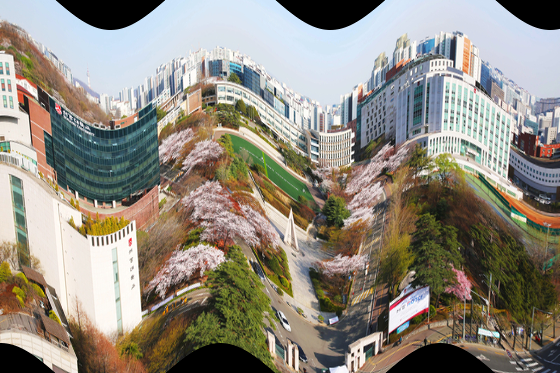

In [63]:
cosy = mapy + A * np.cos(mapx/L)
im_cosy = cv2.remap(im, mapx, cosy, cv2.INTER_LINEAR)
show(im_cosy)

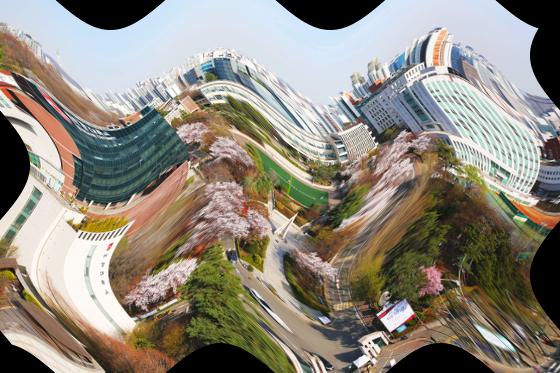

In [65]:
im_cosy_sinx = cv2.remap(im, sinx, cosy, cv2.INTER_LINEAR)
show(im_cosy_sinx)

## A progressive wave of single frequency along x-axis

$$
    w(x, t) = A \sin \left[\frac{2\pi}{L} (v t - x) \right]
$$
- The wave $w(x,t)$ propagates along the x axis.
- At a time instant $t_0$, it is a spatial wave $w(x, t_0)$ along the x axis.
- At a space location $x_0$, the signal $w(x_0, t)$ shows a sinusoidal form through time.

In [83]:
L = 10
A = 2 
v = 1
x = np.linspace(0, 30, 300)

def wave(t):
    return A * np.sin( 2 * np.pi * (v * t - x) / L)

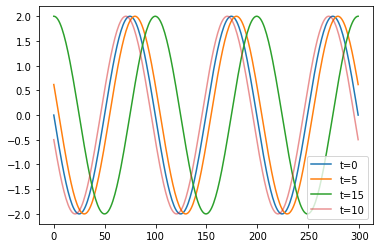

In [91]:
plt.plot(wave(t=0), label="t=0");
plt.plot(wave(t=.5), label="t=5");
plt.plot(wave(t=2.5), label="t=15");
plt.plot(wave(t=9.6), label="t=10", alpha=.5);
plt.legend();